## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

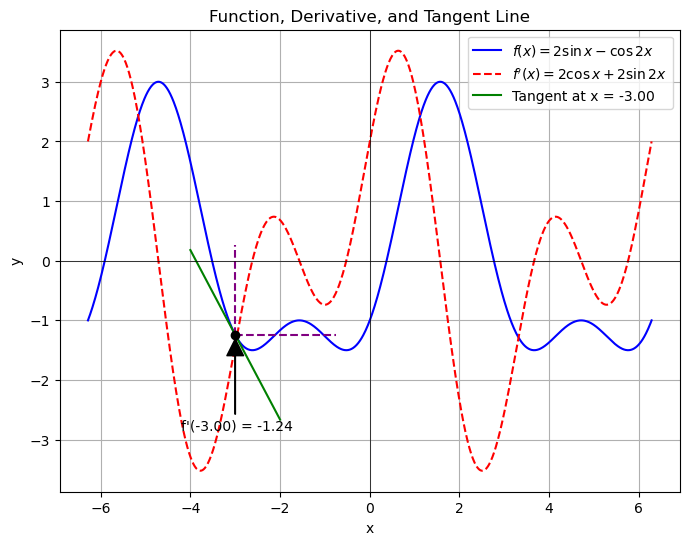

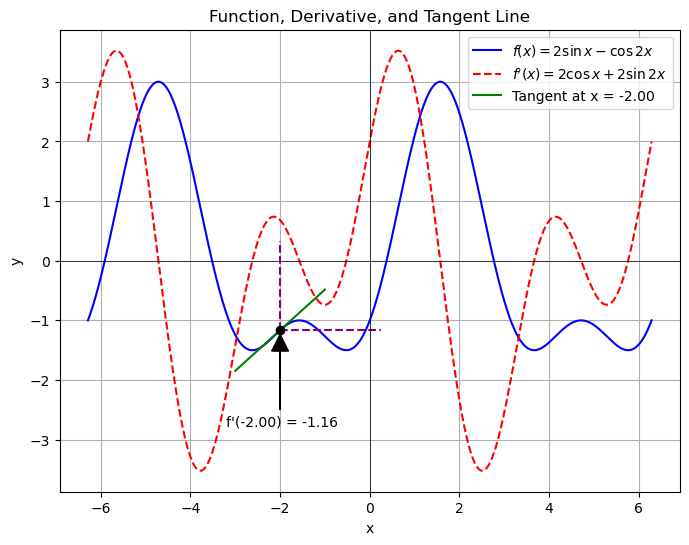

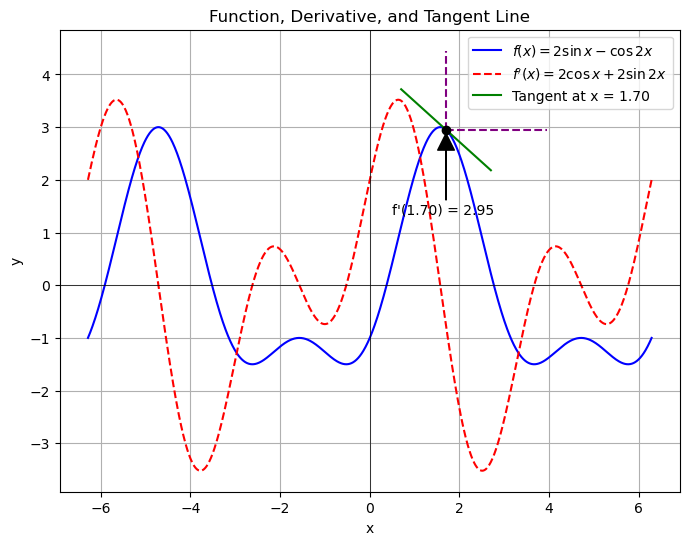

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def beauty_derivative_plot(x0):
    def f(x):
        return 2 * np.sin(x) - np.cos(2 * x)
    
    def df(x):
        return 2 * np.cos(x) + 2 * np.sin(2 * x)

    x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    y = f(x)
    dy = df(x)

    y0 = f(x0)
    der0 = df(x0)

    tangent_x = np.linspace(x0 - 1, x0 + 1, 50)
    tangent_y = y0 + der0 * (tangent_x - x0)

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=r"$f (x) = 2\sin{x} - \cos{2x}$", color='blue')
    plt.plot(x, dy, '--', label=r"$f' (x) = 2\cos{x} + 2\sin{2x}$", color='red')
    plt.plot(tangent_x, tangent_y, label=f"Tangent at x = {x0:.2f}", color='green')

    plt.scatter([x0], [y0], color='black', zorder=3)

    plt.plot([x0, x0], [y0, y0+1.5], color='purple', linestyle='--')
    plt.plot([x0, x0+2.25], [y0, y0], color='purple', linestyle='--')

    plt.annotate('', xy=(x0, y0), xytext=(x0, y0 - 1.4), 
                 arrowprops=dict(facecolor='black', edgecolor='black', width=0.3, shrink=0.05))

    plt.text(x0 - 1.2, y0 - 1.65, f"f'({x0:.2f}) = {y0:.2f}", fontsize=10, verticalalignment='bottom')



    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.title("Function, Derivative, and Tangent Line")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.7)

    

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

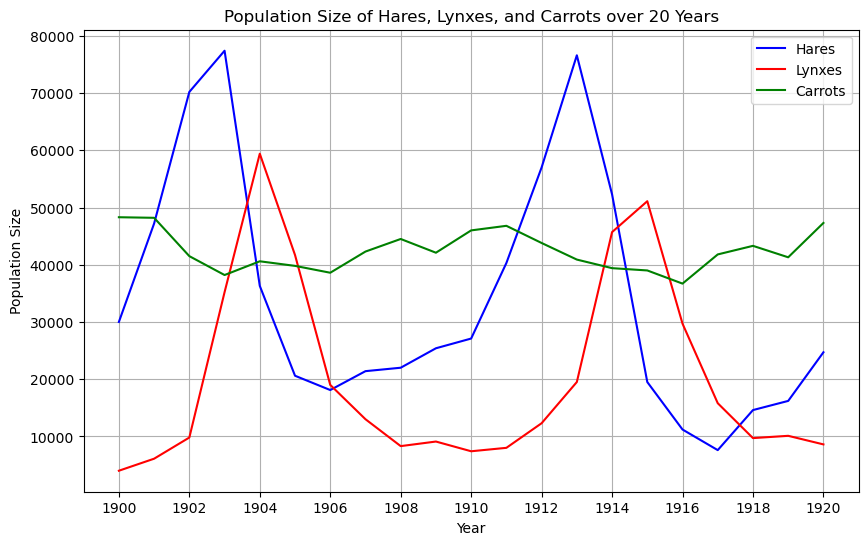

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('Materials/populations.txt', delimiter='\t', comments='#')

year = data[:, 0]
hare = data[:, 1]
lynx = data[:, 2]
carrot = data[:, 3]

plt.figure(figsize=(10, 6))
plt.plot(year, hare, label='Hares', color='blue')
plt.plot(year, lynx, label='Lynxes', color='red')
plt.plot(year, carrot, label='Carrots', color='green')
plt.xticks(np.arange(min(year), max(year) + 1, 2))

plt.xlabel('Year')
plt.ylabel('Population Size')
plt.title('Population Size of Hares, Lynxes, and Carrots over 20 Years')

plt.legend()
plt.grid(True)
plt.show()


- Find which year each species had the largest population. Mark these years in the plot of populations.

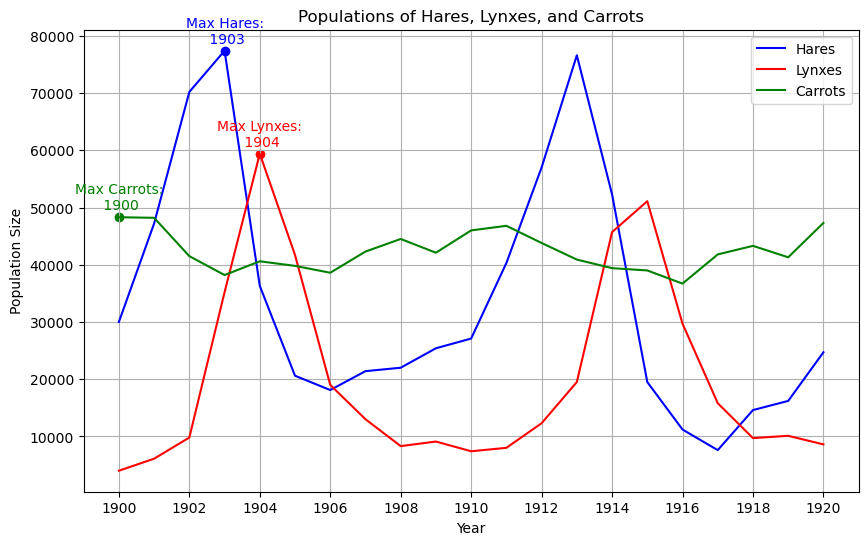

In [64]:

hare_max_year, lynx_max_year, carrot_max_year = np.argmax(hare) + 1900, np.argmax(lynx) + 1900, np.argmax(carrot) + 1900
hare_max_value, lynx_max_value, carrot_max_value = hare[hare_max_year - 1900], lynx[lynx_max_year - 1900], carrot[carrot_max_year - 1900]

plt.figure(figsize=(10, 6))
plt.plot(year, hare, label='Hares', color='blue')
plt.plot(year, lynx, label='Lynxes', color='red')
plt.plot(year, carrot, label='Carrots', color='green')
plt.xticks(np.arange(min(year), max(year) + 1, 2))

plt.scatter(hare_max_year, hare_max_value, color='blue')
plt.scatter(lynx_max_year, lynx_max_value, color='red')
plt.scatter(carrot_max_year, carrot_max_value, color='green')

plt.text(hare_max_year, hare_max_value + 800, f'Max Hares:\n {int(hare_max_year)}', 
        color='blue', ha='center', va='bottom')
plt.text(lynx_max_year, lynx_max_value + 800, f'Max Lynxes:\n {int(lynx_max_year)}', 
        color='red', ha='center', va='bottom')
plt.text(carrot_max_year, carrot_max_value + 800, f'Max Carrots:\n {int(carrot_max_year)}', 
        color='green', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Population Size')
plt.title('Populations of Hares, Lynxes, and Carrots')
plt.grid(True)
plt.legend()
plt.show()




- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

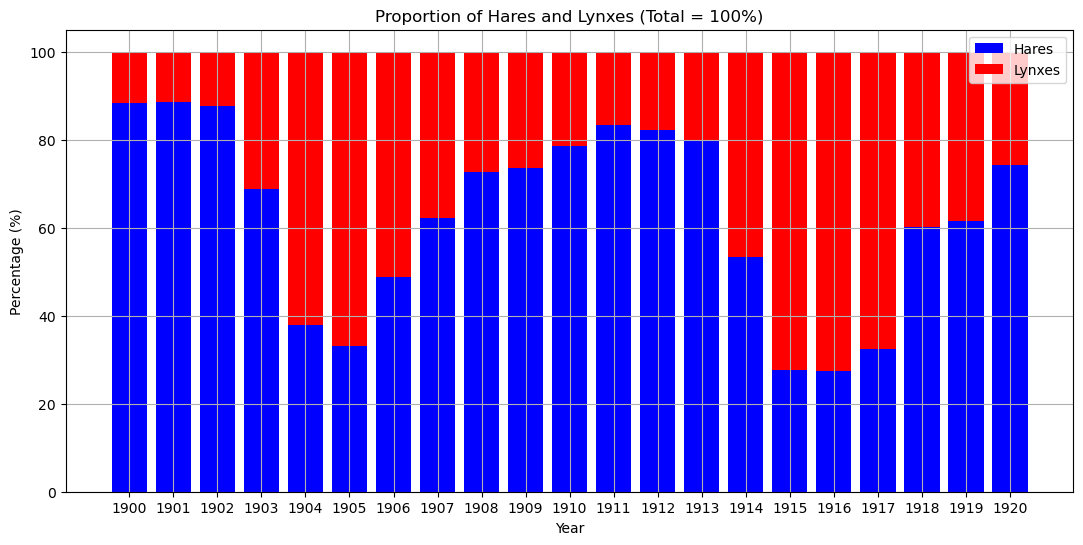

In [75]:
total = hare + lynx
hare_percent = (hare / total) * 100
lynx_percent = (lynx / total) * 100

plt.figure(figsize=(13, 6))

plt.bar(year, hare_percent, color='blue', label='Hares')

plt.bar(year, lynx_percent, bottom=hare_percent, color='red', label='Lynxes')

plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Proportion of Hares and Lynxes (Total = 100%)')
plt.xticks(np.arange(min(year), max(year) + 1, 1))
plt.legend()
plt.grid(True)
plt.show()


- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

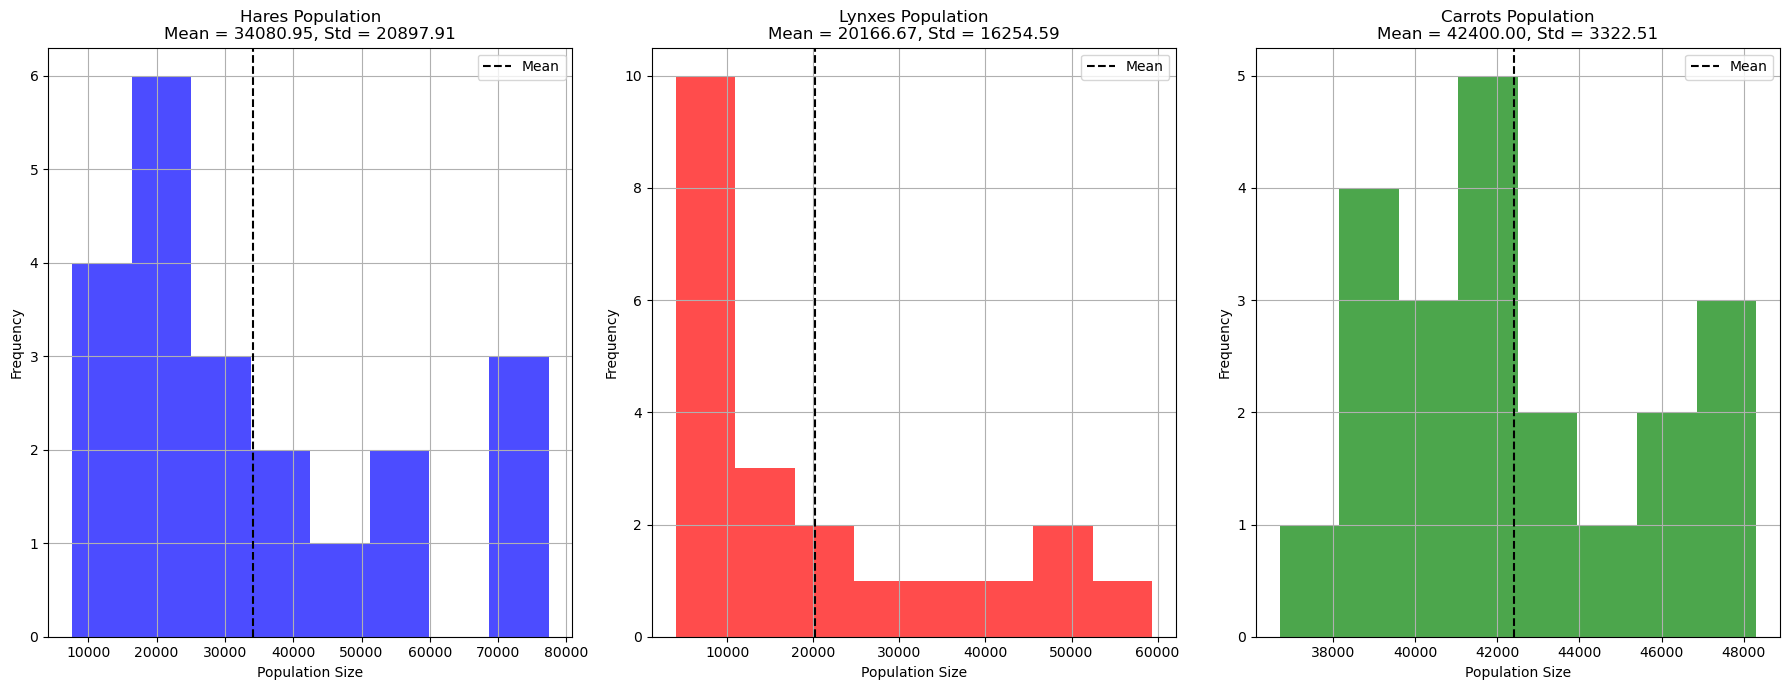

In [62]:
hare_mean = np.mean(hare)
hare_std = np.std(hare)
lynx_mean = np.mean(lynx)
lynx_std = np.std(lynx)
carrot_mean = np.mean(carrot)
carrot_std = np.std(carrot)

fig, axes = plt.subplots(1, 3, figsize=(18, 7))

axes[0].hist(hare, bins=8, color='blue', alpha=0.7)
axes[0].axvline(hare_mean, color='black', linestyle='dashed', linewidth=1.5, label='Mean')
axes[0].set_title('Hares Population\nMean = {:.2f}, Std = {:.2f}'.format(hare_mean, hare_std))
axes[0].set_xlabel('Population Size')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)
axes[0].legend()

axes[1].hist(lynx, bins=8, color='red', alpha=0.7)
axes[1].axvline(lynx_mean, color='black', linestyle='dashed', linewidth=1.5, label='Mean')
axes[1].set_title('Lynxes Population\nMean = {:.2f}, Std = {:.2f}'.format(lynx_mean, lynx_std))
axes[1].set_xlabel('Population Size')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)
axes[1].legend()

axes[2].hist(carrot, bins=8, color='green', alpha=0.7)
axes[2].axvline(carrot_mean, color='black', linestyle='dashed', linewidth=1.5, label='Mean')
axes[2].set_title('Carrots Population\nMean = {:.2f}, Std = {:.2f}'.format(carrot_mean, carrot_std))
axes[2].set_xlabel('Population Size')
axes[2].set_ylabel('Frequency')
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


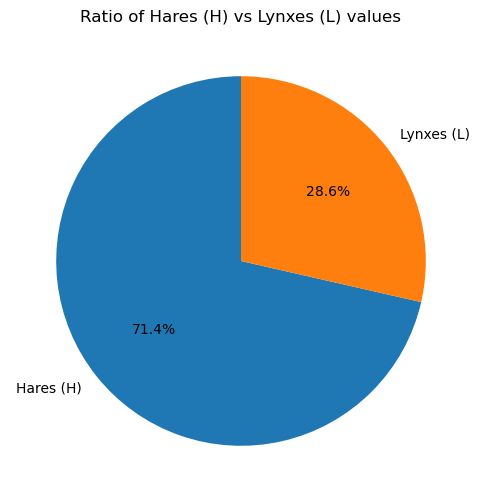

In [70]:
result = np.where(hare >= lynx, 'H', 'L')
print(list(result))

count_H = np.sum(result == 'H')
count_L = np.sum(result == 'L')

labels = ['Hares (H)', 'Lynxes (L)']
sizes = [count_H, count_L]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Ratio of Hares (H) vs Lynxes (L) values')
plt.show()


- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

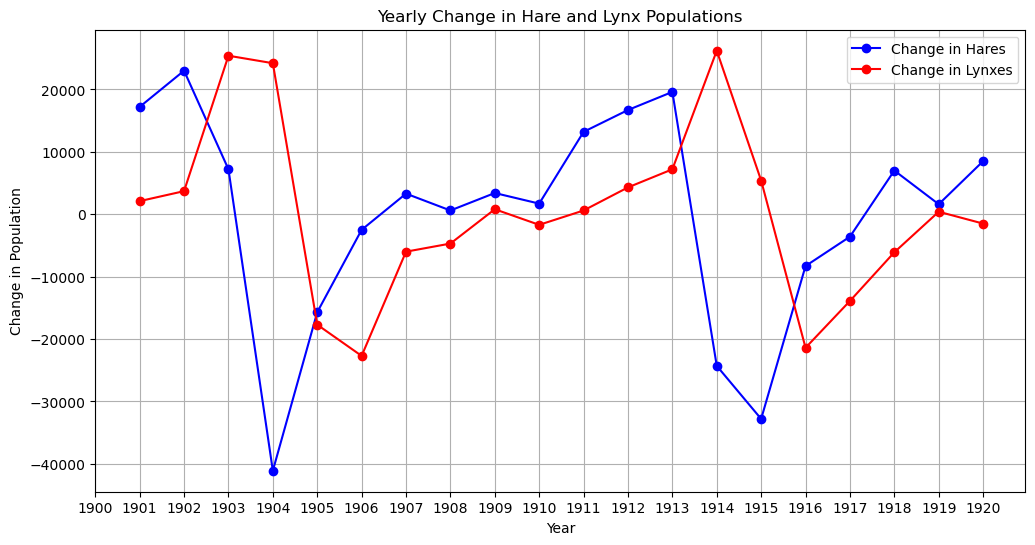

Correlation coefficient between hare and lynx population: 0.07189206073535571


In [82]:
hare_change = np.diff(hare)
lynx_change = np.diff(lynx)
year_diff = year[1:]

plt.figure(figsize=(12, 6))
plt.plot(year_diff, hare_change, label='Change in Hares', color='blue', marker='o')
plt.plot(year_diff, lynx_change, label='Change in Lynxes', color='red', marker='o')
plt.xlabel('Year')
plt.ylabel('Change in Population')
plt.title('Yearly Change in Hare and Lynx Populations')
plt.xticks(np.arange(min(year), max(year) + 1, 1))

plt.legend()
plt.grid(True)
plt.show()

corr_coeff = np.corrcoef(hare, lynx)[0, 1]
print("Correlation coefficient between hare and lynx population:", corr_coeff)


- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

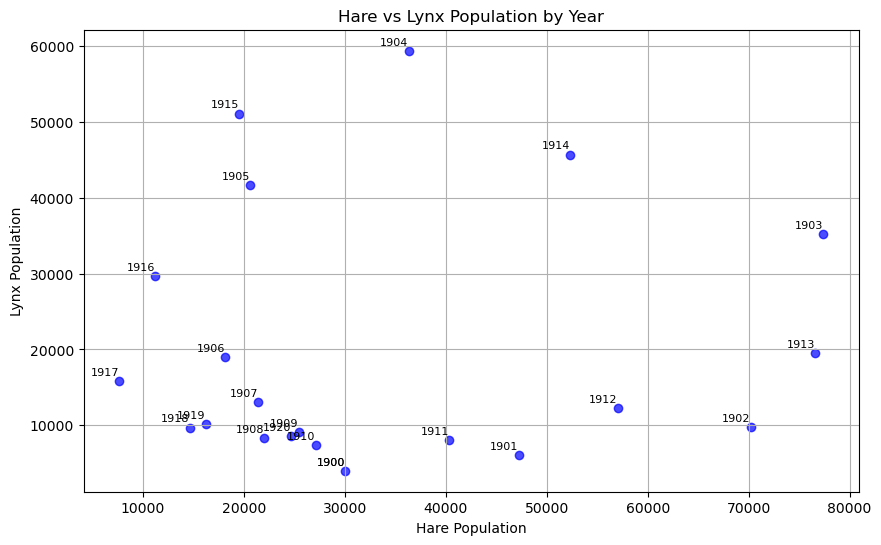

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(hare, lynx, color='blue', alpha=0.7)
int_year = year.astype(int)

def annotate(x, y, text):
    plt.text(x, y + 500, text, fontsize=8, ha='right', va='bottom')

np.vectorize(annotate)(hare, lynx, int_year.astype(str))

plt.xlabel('Hare Population')
plt.ylabel('Lynx Population')
plt.title('Hare vs Lynx Population by Year')
plt.grid(True)
plt.show()



- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

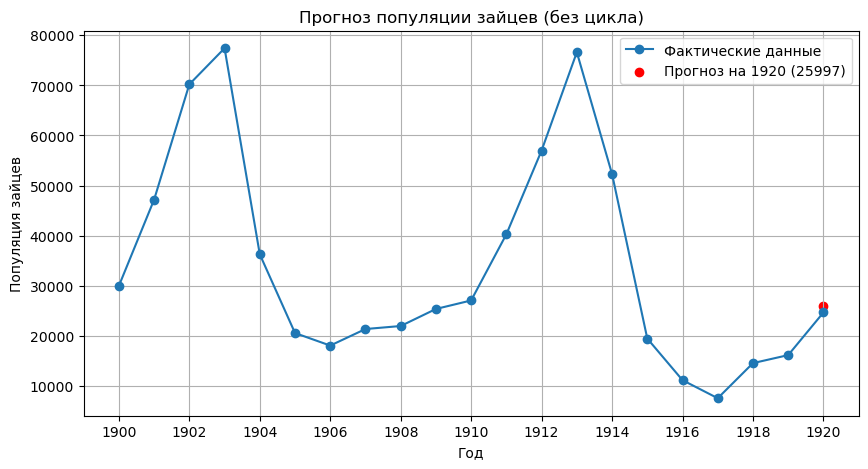

Estimated hare population in 1920: 25996.6925
True hare population in 1920: 24700.0
Error ratio: 0.0525


In [108]:
new_years_сoef = 1.2
ind = np.arange(20)

balanced_weights = new_years_сoef ** ind
balanced_weights /= balanced_weights.sum()
hare_1920_estimated = np.dot(hare[:-1], balanced_weights)

plt.figure(figsize=(10, 5))
plt.plot(year, hare, marker='o', label="Фактические данные")
plt.scatter(1920, hare_1920_estimated, color='red', label=f"Прогноз на 1920 ({hare_1920_estimated:.0f})")
plt.xlabel("Год")
plt.ylabel("Популяция зайцев")
plt.xticks(np.arange(min(year), max(year) + 1, 2))

plt.legend()
plt.title("Прогноз популяции зайцев (без цикла)")
plt.grid()
plt.show()

hare_1920_true = hare[-1]
error = hare_1920_estimated - hare_1920_true
error_ratio = error / hare_1920_true

print(f"Estimated hare population in 1920: {hare_1920_estimated:.4f}")
print(f"True hare population in 1920: {hare_1920_true}")
print(f"Error ratio: {error_ratio:.4f}")

